In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path = 'dataset/Train.csv'

In [88]:
df = pd.read_csv(path)
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


## Dropping irrelevant columns

In [89]:
df = df.drop(
    [   
        'ID',
        'region_code',
        'personal_loan_active', 
        'personal_loan_closed', 
        'vehicle_loan_active', 
        'vehicle_loan_closed', 
        'loan_enq'
    ], axis=1)

## Combinig April, May, June cc and dc consumption

In [90]:
no_of_months = 3

df['cc_cons_avg'] = (df.cc_cons_apr + df.cc_cons_may + df.cc_cons_jun) / no_of_months
df['dc_cons_avg'] = (df.dc_cons_apr + df.dc_cons_may + df.cc_cons_jun) / no_of_months

df['cc_count_avg'] = (df.cc_count_apr + df.cc_count_may + df.cc_count_jun) / no_of_months
df['dc_count_avg'] = (df.dc_count_apr + df.dc_count_may + df.dc_count_jun) / no_of_months 

In [91]:
df = df.drop([
        'cc_cons_apr',
        'cc_cons_may',
        'cc_cons_jun',

        'dc_cons_apr',
        'dc_cons_may',
        'dc_cons_jun',
    
        'cc_count_apr',
        'cc_count_may',
        'cc_count_jun',
    
        'dc_count_apr',
        'dc_count_may',
        'dc_count_jun',
    
    ], axis=1)

## Dropping rows with credit limit 0

In [92]:
df = df[df.card_lim > 0]

## Imputing age > 75 with median 

In [93]:
median = df.loc[df.age <= 75, 'age'].median()

df.loc[df.age > 75, 'age'] = np.nan
df = df.fillna(median)

df.describe()

,age,region_code,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg
count,14964.000000,14964.000000,14964.000000,1.496400e+04,1.496400e+04,14964.000000,14964.000000,1.496400e+04,1.496400e+04,14964.000000,...,1.496400e+04,14964.000000,14964.000000,1.496400e+04,1.496400e+04,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000
mean,42.498931,598.349439,277671.559142,6.198422e+05,2.332940e+05,44462.971057,3522.067082,6.828904e+04,8.080678e+04,36.394213,...,7.851045e+04,19.963045,44.633119,5.260045e+04,1.574706e+04,55125.981957,15477.751817,9338.188769,38.828121,20.478638
std,12.012349,220.023146,179129.458463,3.089789e+06,4.071666e+05,88152.871269,7368.374949,1.127828e+05,1.991243e+05,30.696849,...,1.483396e+05,27.219981,35.085325,1.283941e+05,1.180395e+05,97593.000279,13801.311900,10088.363527,39.751965,12.995846
min,25.000000,123.000000,10000.000000,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,...,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000,514.956667,380.506667,1.000000,1.000000
25%,33.000000,424.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.328507e+04,2.684600e+04,11.000000,...,2.492008e+04,4.000000,12.000000,1.903950e+04,1.550865e+03,6764.750000,7334.617083,4115.643333,18.333333,9.666667
50%,38.000000,623.000000,272000.000000,4.524950e+04,1.110000e+05,13873.000000,2351.000000,4.197025e+04,4.704900e+04,32.000000,...,4.587936e+04,7.000000,37.000000,3.042550e+04,3.953580e+03,13364.000000,11818.423333,6773.078333,30.333333,19.333333
75%,53.000000,799.000000,400000.000000,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.537767e+04,8.591945e+04,52.000000,...,8.551100e+04,21.000000,73.000000,5.320200e+04,9.372410e+03,20105.750000,19073.650833,11220.295000,44.666667,29.000000
max,69.000000,974.000000,1000000.000000,6.597743e+07,5.000000e+06,610000.000000,35346.000000,5.156864e+06,1.059212e+07,147.000000,...,6.611953e+06,117.000000,133.000000,5.200000e+06,7.447125e+06,408382.000000,387231.370000,314984.483333,406.666667,73.000000


## Managing Skewed Data

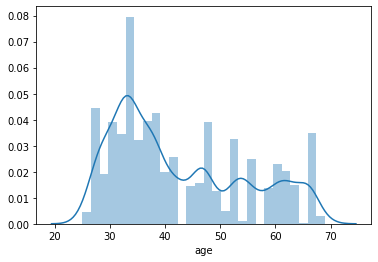

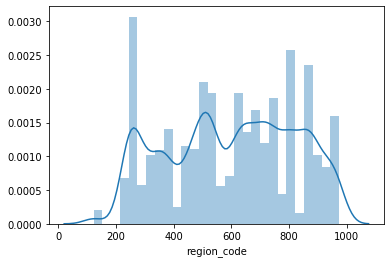

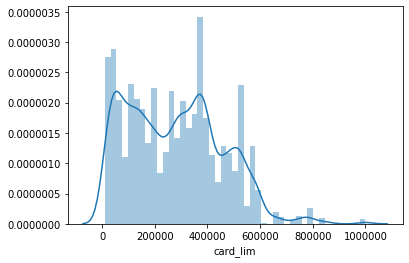

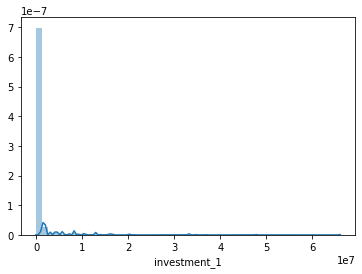

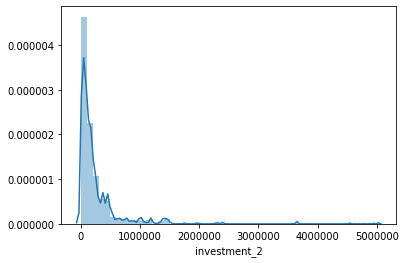

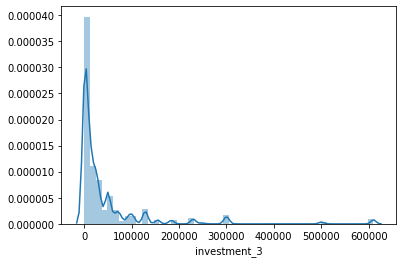

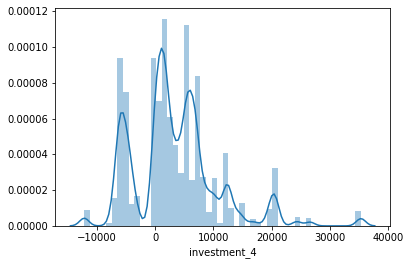

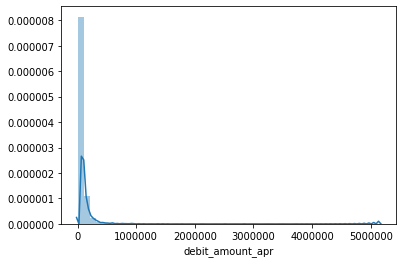

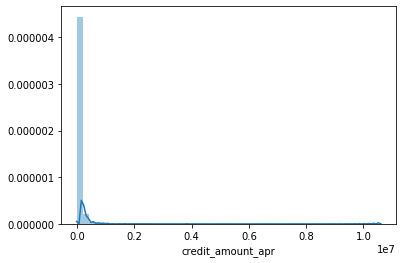

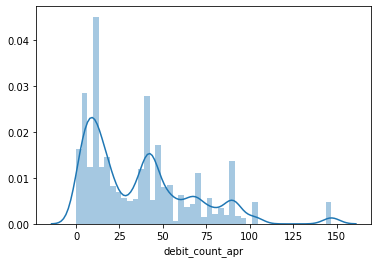

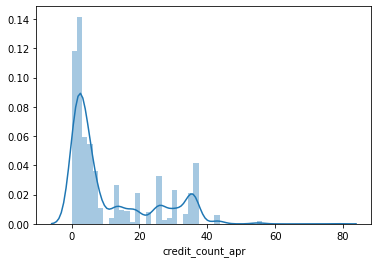

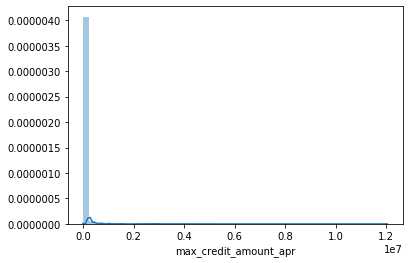

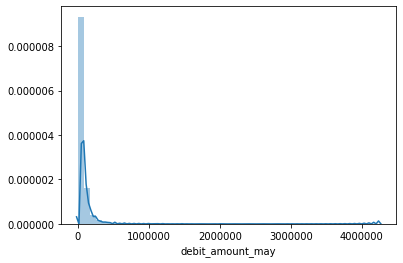

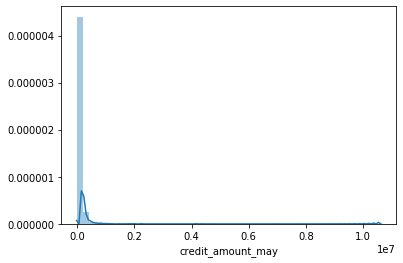

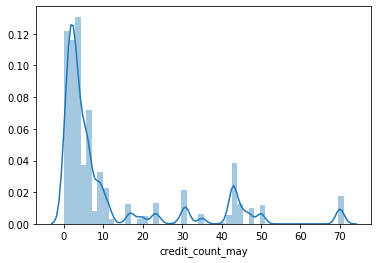

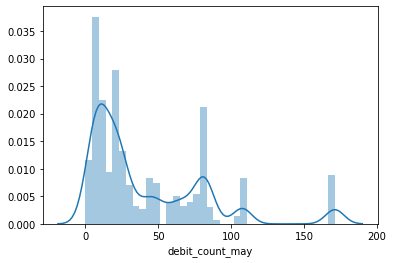

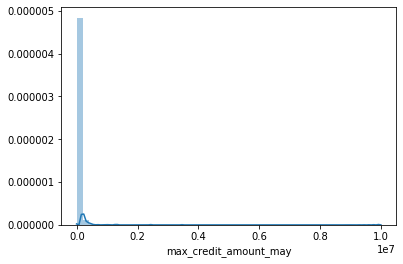

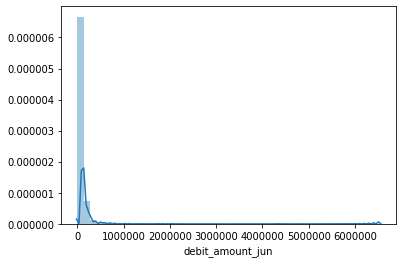

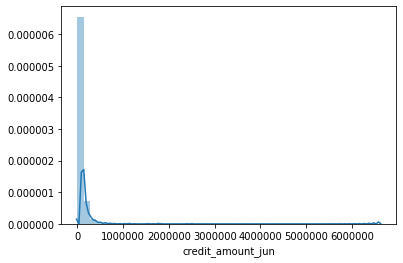

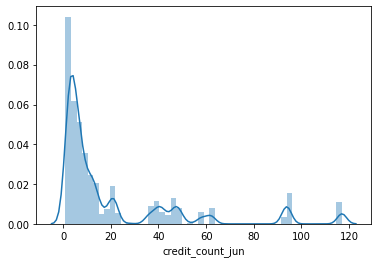

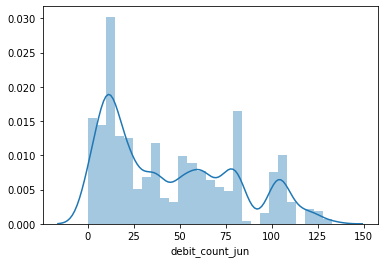

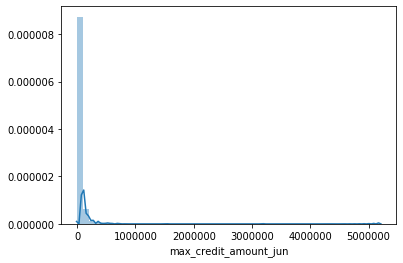

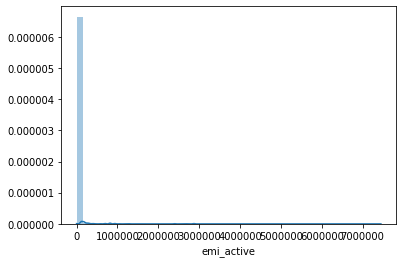

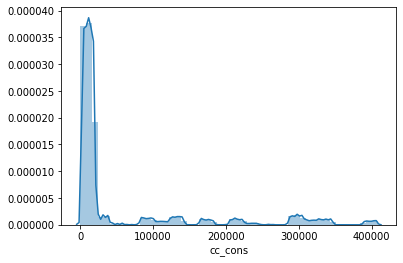

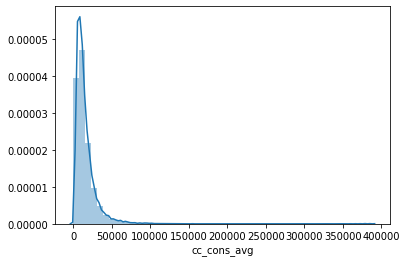

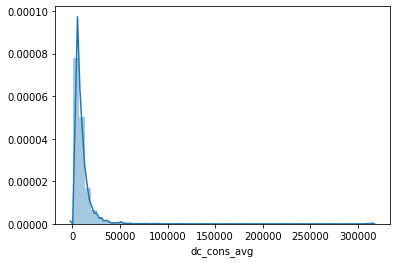

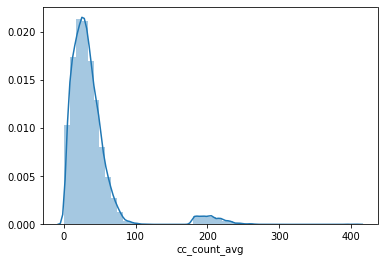

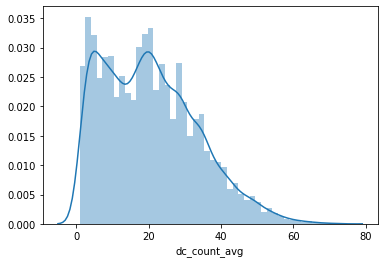

In [94]:
num_cols = df.select_dtypes(exclude='object').columns

for col in num_cols:
    sns.distplot(df[col])
    plt.show()

## Normalising Right Skewed Data with Log Transformation

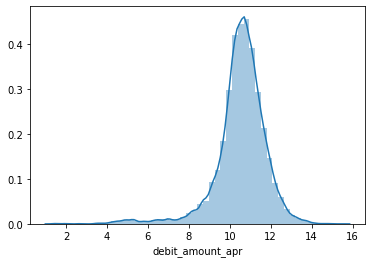

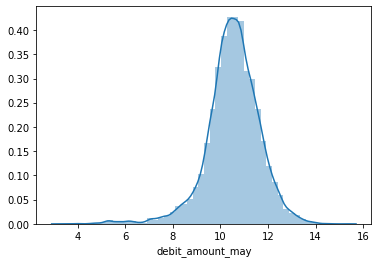

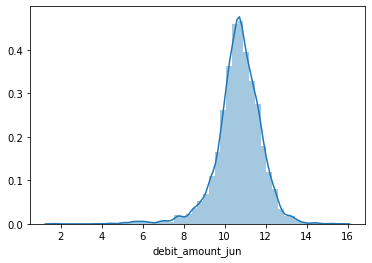

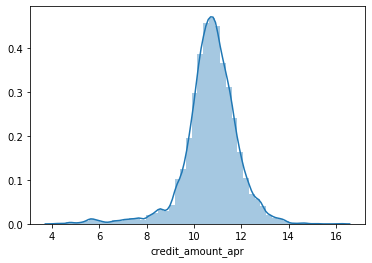

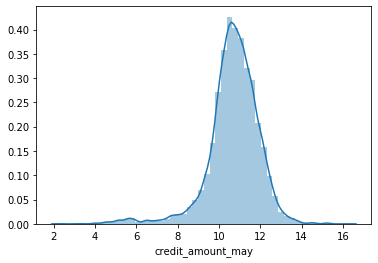

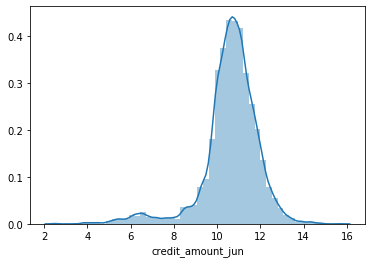

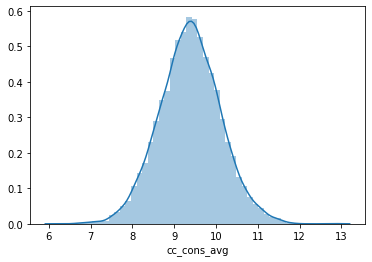

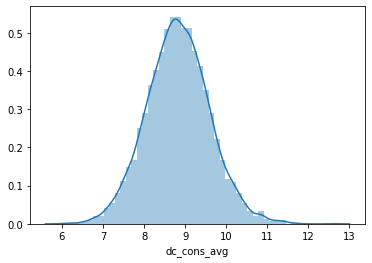

In [118]:
right_skewed_cols = [
    
    'debit_amount_apr',
    'debit_amount_may',
    'debit_amount_jun',
    
    'credit_amount_apr',
    'credit_amount_may',
    'credit_amount_jun',
    
    'cc_cons_avg',
    'dc_cons_avg',
]


def log_transfrom(col):
    
    transformed_col = np.log(df[col])
    sns.distplot(transformed_col)
    plt.show()
    
    return transformed_col


for col in right_skewed_cols:
    
    df[col] = log_transfrom(col)